In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

import os, pendulum

In [6]:
# apple_data파일 불러오기
file_path = './Data02/'
file_list = os.listdir(file_path)
print(file_list)
file_name = file_list[0]

df_rawdata_stock_apple = pd.read_csv(file_path+file_name)
df_rawdata_stock_apple.info()
df_rawdata_stock_apple

['2023-08-22_apple_data.csv', 'comment_rank.csv', 'ratings_train.txt', '연습12-02.txt', '연습12-03.txt', '연습12-04.xlsx', '연습12-05.xlsx']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       410 non-null    object 
 1   Open       410 non-null    float64
 2   High       410 non-null    float64
 3   Low        410 non-null    float64
 4   Close      410 non-null    float64
 5   Adj Close  410 non-null    float64
 6   Volume     410 non-null    int64  
 7   close_rtn  409 non-null    float64
 8   close_ma   409 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 29.0+ KB


,Date,Open,High,Low,Close,Adj Close,Volume,close_rtn,close_ma
0,2022-01-03,177.830002,182.880005,177.710007,182.009995,180.190964,104487900,NaN,NaN
1,2022-01-04,182.630005,182.940002,179.119995,179.699997,177.904053,99310400,-0.012692,180.854996
2,2022-01-05,179.610001,180.169998,174.639999,174.919998,173.171829,94537600,-0.026600,177.309998
3,2022-01-06,172.699997,175.300003,171.639999,172.000000,170.281021,96904000,-0.016693,173.459999
4,2022-01-07,172.889999,174.139999,171.029999,172.169998,170.449310,86709100,0.000988,172.084999
...,...,...,...,...,...,...,...,...,...
405,2023-08-15,178.880005,179.479996,177.050003,177.449997,177.449997,43622600,-0.011200,178.455002
406,2023-08-16,177.130005,178.539993,176.500000,176.570007,176.570007,46964900,-0.004959,177.010002
407,2023-08-17,177.139999,177.509995,173.479996,174.000000,174.000000,66062900,-0.014555,175.285003
408,2023-08-18,172.300003,175.100006,171.960007,174.490005,174.490005,61114200,0.002816,174.245002


In [52]:
model = ARIMA(df_rawdata_stock_apple['Close'].values, order=(2,1,2))
model_fit = model.fit()
model_fit.summary()

g:\Programming\Python\venv_py3913_RPA\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  410
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1021.376
Date:                Tue, 22 Aug 2023   AIC                           2052.752
Time:                        21:07:59   BIC                           2072.821
Sample:                             0   HQIC                          2060.693
                                - 410                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0553      0.033      1.681      0.093      -0.009       0.120
ar.L2          0.9227      0.027     33.560      0.000       0.869       0.977
ma.L1       6.274e-05   1.49e+04   4.21e-09      1.000   -2.92e+04    2.92e+04
ma.L2         -0.9999   1.49e+04  -6.72e-05      1.000   -2.92e+04    2.92e+04
sigma2         8.5603   1.27e+05   6.72e-05      1.000    -2.5e+05     2.5e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                37.10
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               0.39   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

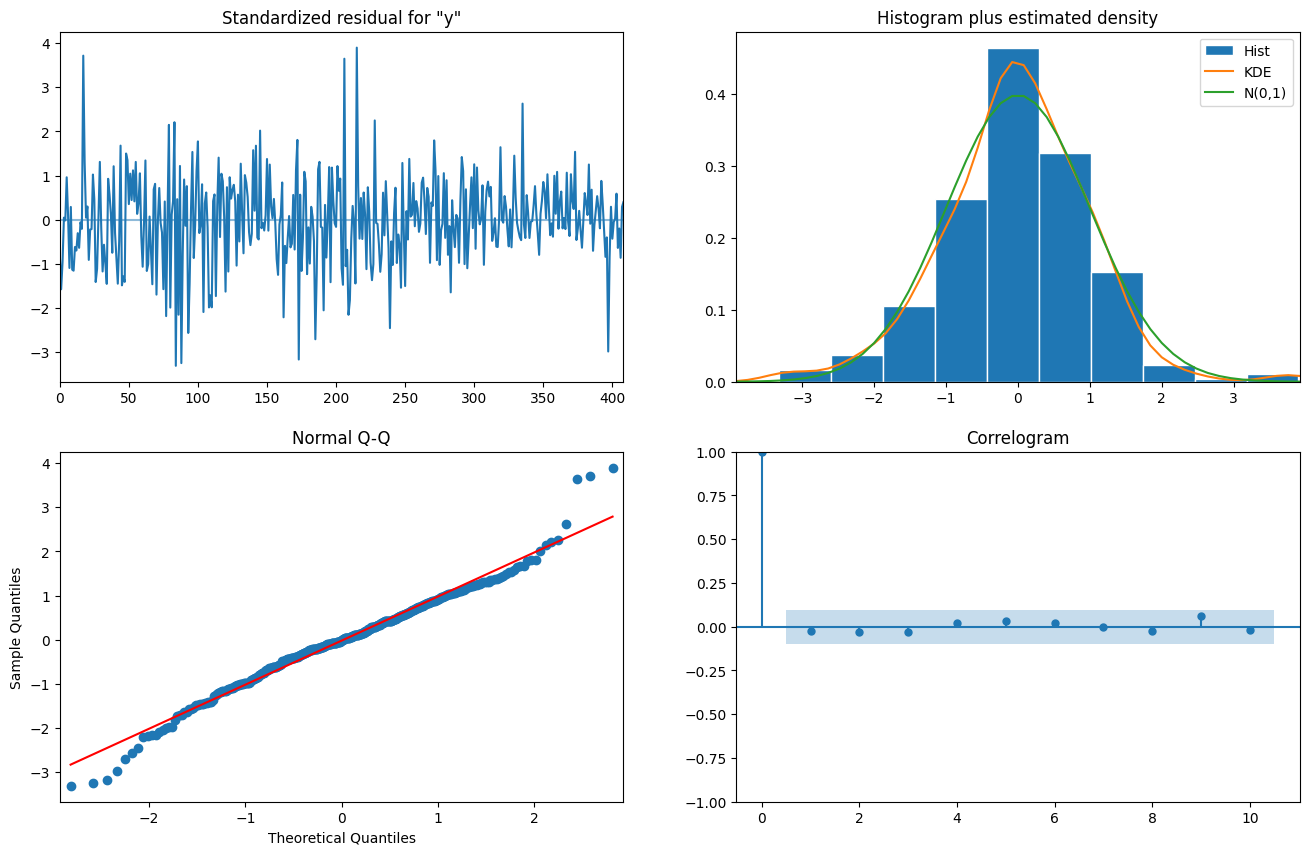

In [53]:
# 1. Standardized residuals over time
# 2. Histogram plus estimated density of standardized residuals, along with a Normal(0,1) density plotted for reference.
# 3. Normal Q-Q plot, with Normal reference line.
# 4. Correlogram

model_fit.plot_diagnostics(figsize=(16,10))
plt.show()

In [54]:
pred = model_fit.get_prediction()
df_result_pred = pd.concat([pd.Series(pred.predicted_mean, name='predicted'), pd.DataFrame(pred.conf_int(), columns=['low', 'high'])], axis=1)
df_result_pred01 = df_result_pred.iloc[1:, ].reset_index(drop=True)
df_result_pred01

,predicted,low,high
0,182.010040,176.161620,187.858460
1,179.636061,173.789877,185.482245
2,174.870449,169.028470,180.712428
3,172.038867,166.198808,177.878927
4,172.247489,166.411194,178.083783
...,...,...,...
404,179.333884,173.588051,185.079718
405,177.163733,171.417900,182.909566
406,176.543381,170.797595,182.289168
407,173.638714,167.892928,179.384499


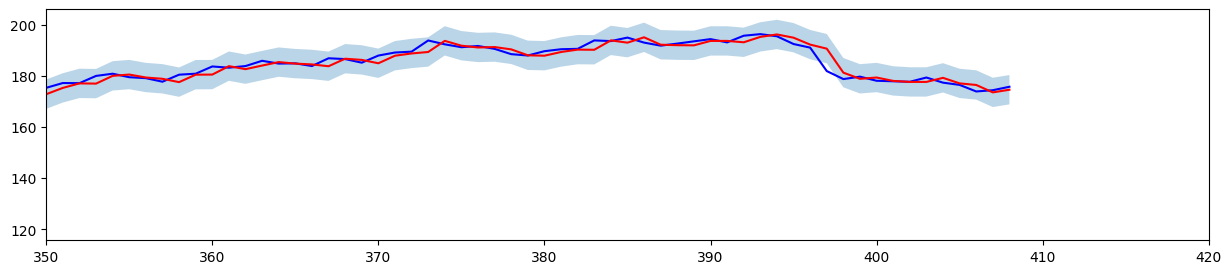

In [55]:
df_mod00_stock_apple = df_rawdata_stock_apple.iloc[1:,:].reset_index(drop=True)

fig, ax = plt.subplots()
fig.set_size_inches(15,3)

ax.plot(df_mod00_stock_apple.index, df_mod00_stock_apple.Close, color='b')
ax.plot(df_result_pred01.index, df_result_pred01.iloc[:, 0], color='r')
ax.fill_between(df_result_pred01.index, df_result_pred01.iloc[:,1], df_result_pred01.iloc[:,2], alpha=.3, linewidth=0)
ax.set_xlim(350, 420)
plt.show()

In [56]:
pred = model_fit.get_forecast(steps=10)
df_result_forecast = pd.concat([pd.Series(pred.predicted_mean, name='predicted'), pd.DataFrame(pred.conf_int(), columns=['low', 'high'])], axis=1)
df_result_forecast.describe()

,predicted,low,high
count,10.000000,10.000000,10.000000
mean,175.098361,162.143518,188.053203
std,0.336314,4.304543,3.663903
min,174.652674,156.674806,181.263971
25%,174.867057,158.897822,185.797589
50%,175.093246,161.520900,188.665592
75%,175.333184,164.819507,190.851025
max,175.589193,169.772495,192.632798


In [57]:
df_total_result = pd.concat([df_result_pred01, df_result_forecast], axis=0).reset_index(drop=True)
df_total_result

,predicted,low,high
0,182.010040,176.161620,187.858460
1,179.636061,173.789877,185.482245
2,174.870449,169.028470,180.712428
3,172.038867,166.198808,177.878927
4,172.247489,166.411194,178.083783
...,...,...,...
414,175.108578,160.918012,189.299145
415,174.863374,159.653001,190.073746
416,174.878107,158.646096,191.110118
417,174.652674,157.550668,191.754680


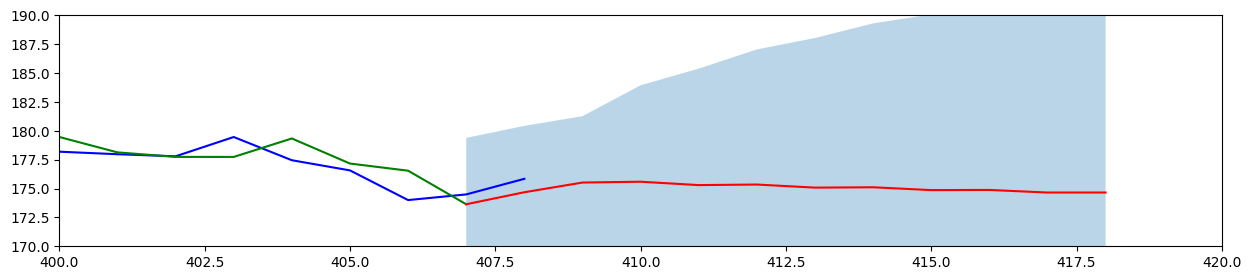

In [58]:
df_mod00_stock_apple = df_rawdata_stock_apple.iloc[1:,:].reset_index(drop=True)

fig, ax = plt.subplots()
fig.set_size_inches(15,3)

ax.plot(df_mod00_stock_apple.index, df_mod00_stock_apple.Close, color='b')
ax.plot(df_total_result.index[:408], df_total_result.iloc[:408, 0], color='g')
ax.plot(df_total_result.index[407:], df_total_result.iloc[407:, 0], color='r')
ax.fill_between(df_total_result.index[407:], df_total_result.iloc[407:,1], df_total_result.iloc[407:,2], alpha=.3, linewidth=0)
ax.set_xlim(400,420)
ax.set_ylim(170,190)

plt.show()